### Driver data clustering
1) Read the dataset<br>
2) Remove handle null values if any<br>
3) Depict 'Distance_Feature' and 'Speeding_Feature' on a scatter chart.<br> 
4) Based on 'Distance_Feature' and 'Speeding_Feature' cluster the dataset using KMeans<br>
5) Apply K_Means separately with 2,3,4 and 5 clusters. Depict different clusters on a scatter chart with their respective cluster centriods marked.<br>
6) Scale the data using Standard Scaler<br>
7) Determine appropriate number of cluster using Elbow method after data has been scaled<br>
8) Repeat Q5 with appropriate number of cluster obtained from Elbow method after scaling<br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/driverdata.csv')

In [ ]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
df.shape

(4000, 3)

In [ ]:
df.isnull().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

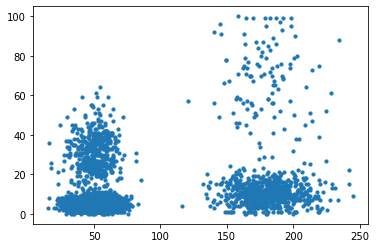

In [ ]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],marker='o',s=10)
plt.show()

In [ ]:
x=df.iloc[:,1:]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,10):
  cls=KMeans(n_clusters=i)
  cls.fit(x)
  wcss.append(cls.inertia_)
print(wcss)

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.5383469037, 534638.1242580615, 372841.24097840965, 319824.52413426683, 276922.15229803696, 252682.869366928]


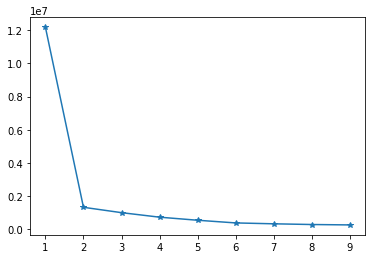

In [ ]:
plt.plot(range(1,10),wcss,marker='*')
plt.show()

In [ ]:
cls2=KMeans(n_clusters=2)
cls2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cls2_pred=cls2.predict(x)
len(cls2_pred)

4000

In [ ]:
cls2_pred[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
cent2=cls2.cluster_centers_
cent2

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


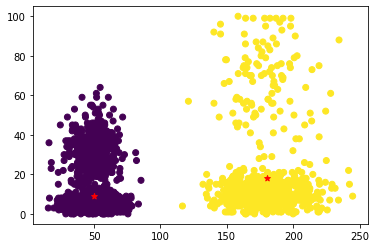

In [ ]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=cls2_pred)
plt.scatter(cent2[:,0],cent2[:,1],marker='*',color='red')
plt.show()

**With 3 Clusters**

In [ ]:
cls3=KMeans(n_clusters=3)
cls3.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cls3_pred=cls3.predict(x)

In [ ]:
cls3_pred[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
cent3=cls3.cluster_centers_

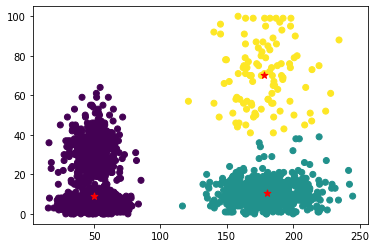

In [ ]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=cls3_pred)
plt.scatter(cent3[:,0],cent3[:,1],marker='*',s=50,color='Red')
plt.show()

**With 4 clusters**

In [ ]:
cls4=KMeans(n_clusters=4)
cls4.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cls4_pred=cls4.predict(x)

In [ ]:
cent4=cls4.cluster_centers_

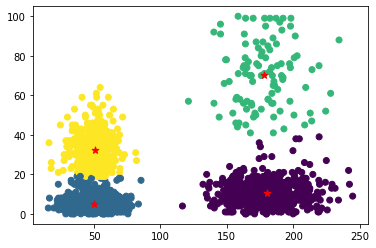

In [ ]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=cls4_pred)
plt.scatter(cent4[:,0],cent4[:,1],marker='*',color='red',s=50)
plt.show()

**With 5 Clusters**

In [ ]:
cls5=KMeans(n_clusters=5)
cls5.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cls5_pred=cls5.predict(x)

In [ ]:
cent5=cls5.cluster_centers_

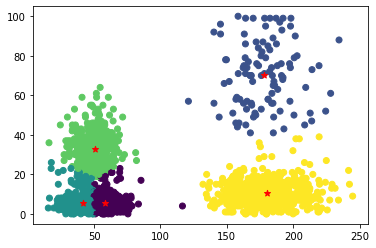

In [ ]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=cls5_pred)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='*',s=40)
plt.show()

**STANDARD SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [ ]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [ ]:
x_sc=pd.DataFrame(x_sc,columns=['Distance_Feature_sc','Speeding_Feature_sc'])
x_sc

,Distance_Feature_sc,Speeding_Feature_sc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744
...,...,...
3995,1.571155,-0.052602
3996,1.872860,-0.417383
3997,1.774474,0.093311
3998,1.872299,-0.417383


In [ ]:
sc=[]
for i in range(2,10):
  cls_sc=KMeans(n_clusters=i)
  cls_sc.fit(x)
  print(i ,cls_sc.inertia_)
  sc.append(cls_sc.inertia_)
print(sc)

2 1316420.8509477186
3 992634.060670247
4 719603.9690822498
5 534644.7224016116
6 372835.5931307842
7 319820.8661905872
8 276914.5586630301
9 252767.87221243116
[1316420.8509477186, 992634.060670247, 719603.9690822498, 534644.7224016116, 372835.5931307842, 319820.8661905872, 276914.5586630301, 252767.87221243116]


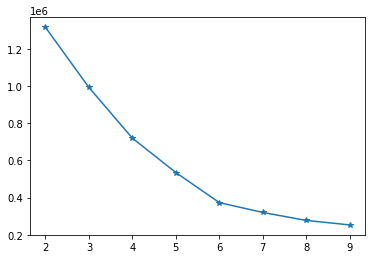

In [ ]:
plt.plot(range(2,10),sc,marker='*')
plt.show()

In [ ]:
cls_sc=KMeans(n_clusters=6)
cls_sc.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cls_sc_pred=cls_sc.predict(x)

In [ ]:
df['Cls6']=cls_sc_pred

In [ ]:
cent6=cls_sc.cluster_centers_

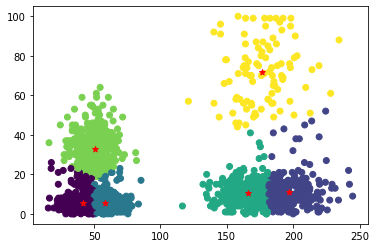

In [ ]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=cls_sc_pred)
plt.scatter(cent6[:,0],cent6[:,1],marker='*',color='red')
plt.show()

In [ ]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature,Cls6
0,3423311935,71.24,28,4
1,3423313212,52.53,25,4
2,3423313724,64.54,27,4
3,3423311373,55.69,22,4
4,3423310999,54.58,25,4
